In [98]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
#import sp.sparse as sp

In [99]:
N = 3
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

In [ ]:
""" def T(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2*n-1)*x*T(n-1,x) - (n-1)*T(n-2,x))/float(n) """

#### To get the Legendre polynomials from n=0 to N, over a set of vectorized nodes we use the following three term recurrence relation #### 
$(n+1)L_{n+1}(x)=(2n+1)xL_{n}(x)−nL_{n−1}(x), n ≥ 1,$

In [100]:
def L(n,x):
    num = len(x)
    out = np.zeros((num,n+1))
    for i in range(n+1):
        for j in range(num):
            if i == 0:
                out[j][i] = 1
            elif i == 1:
                out[j][i] = x[j]
            else:
                out[j][i] = ((2*i-1)*x[j]*out[j][i-1] - (i-1)*out[j][i-2])/float(i)
    return out

#### Plotting first N Legendre polynomials ####

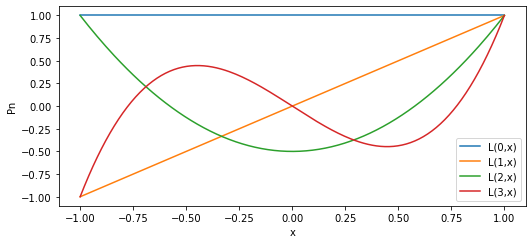

In [101]:
x = np.linspace(-1,1,200)
#for i in range(1,N+1):
y = L(N,x)
for i in range(N+1):
    plt.plot(x,y[:,i],label = f"L({i},x)")
plt.xlabel("x")
plt.ylabel("Pn")
plt.legend()
plt.show()

In [ ]:
""" L = []
for i in range(0,N+1):
    if i == 0:
        f = lambda x:1
        L.append(f)
    elif i == 1:
        f = lambda x:x
        L.append(f)
    else:
        f = lambda x : ((2*i-1)*x*L[i-1](x) - (i-1)*L[i-2](x))/float(i)
        L.append(f) """

#### To get $L'_n(x)$ for n = 0 to N we use the following relation ####
$(1−x^2)L'_n(x) = (n(n+1)/(2n+1))(L_{n−1}(x)−L_{n+1}(x))$ 

In [102]:
def L1(n,x):
    l = L(n+1,x)
    num = len(x)
    out = np.zeros((num,n+1))
    for i in range(num):
        for j in range(1,n+1):
            out[i,j] = ((j*(j+1)/float(2*j+1)))*(l[i][j-1]-l[i][j+1])/(1-x[i]**2)
    return out
    #return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))
#print(L1(5,[2]))

In [ ]:
""" def test(n,x):
    return ((n*(n+1)/float((2*n+1)))*(T(n-1,x)-T(n+1,x))/(1-x**2))
#print(test(5,2)) """ 

#### Plotting first derivatives of first N Legendre polynomials ####

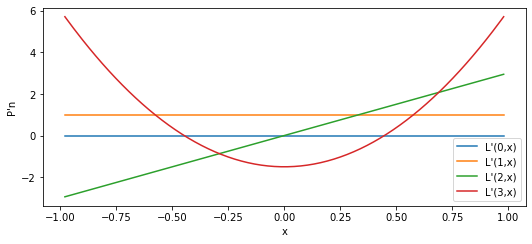

In [103]:
x = np.linspace(-.98,.98,200)
y = L1(N,x)
for i in range(N+1):
    plt.plot(x,y[:,i],label = f"L'({i},x)")
plt.xlabel("x")
plt.ylabel("P'n")
plt.legend()
plt.show()

#### the interior Legendre-Gauss-type nodes are the eigenvalues of the following Jacobian matrix: ####
$$
A_{M+1}=\left[\begin{array}{ccccc}
a_{0} & \sqrt{b_{1}} & & & \\
\sqrt{b_{1}} & a_{1} & \sqrt{b_{2}} & & \\
& \ddots & \ddots & \ddots & \\
& & \sqrt{b_{M-1}} & a_{M-1} & \sqrt{b_{M}} \\
& & & \sqrt{b_{M}} & a_{M}
\end{array}\right],
$$
where

  - For LG: $a_{j}=0, \quad b_{j}=\frac{j^{2}}{4 j^{2}-1}, \quad M=N$

  - For LGR: $a_{j}=\frac{1}{(2 j+1)(2 j+3)}, \quad b_{j}=\frac{j(j+1)}{(2 j+1)^{2}}, \quad M=N-1$.

  - For LGL: $a_{j}=0, \quad b_{j}=\frac{j(j+2)}{(2 j+1)(2 j+3)}, \quad M=N-2$.

In [104]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

In [105]:
#zeroes of L_N+1
def LG(n):
    a = [0 for i in range(0,n+1)]
    b = [math.sqrt((j**2)/(4*(j**2)-1)) for j in range(1,n+1)]
    A = tridiag(b,a,b)
    w,v = LA.eig(A)
    w = sorted(w,reverse=False)
    return w
#print(LG(5))

In [106]:
#zeroes of L_N + L_N+1
def LGR(n):
    a = [1/float(((2*j+1)*(2*j+3))) for j in range(0,n)]
    b = [math.sqrt(((j+1)*j)/((2*j+1)**2)) for j in range(1,n)]
    A = tridiag(b,a,b)
    w,v = LA.eig(A)
    w = np.append(w,-1)
    w = sorted(w,reverse=False)
    return w
#""" print(LGR(5))
#out = [L(N,x)+L(N+1,x) for x in LGR(N)]
#print(out) """

In [107]:
#zeroes of (1-x^2)L'_N
def LGL(n):
    a = [0 for i in range(0,n-1)]
    b = [math.sqrt(j*(j+2)/((2*j+1)*(2*j+3))) for j in range(1,n-1)]
    A = tridiag(b,a,b)
    w,v = LA.eig(A)
    new = np.append(w,[1,-1])
    new = sorted(new,reverse=False)
    return new
#""" print(LGL(5))
#out = [L1(5,x) for x in LGL(5)]
#print(out) """

#### We now also evaluate the LG nodes using Newton's Method ####
$$
\left\{\begin{array}{l}
x_{j}^{k+1}=x_{j}^{k}-\frac{L_{N}\left(x_{j}^{k}\right)}{L_{N}^{\prime}\left(x_{j}^{k}\right)}, \quad k \geq 0 \\
\text { given } x_{j}^{0}, \quad 1 \leq j \leq N-1
\end{array}\right. $$
#### We use the following as the approximation for zeroes of $L_N(x)$ ####
$$
\sigma_{k}=\left[1-\frac{N-1}{8 N^{3}}-\frac{1}{384 N^{4}}\left(39-\frac{28}{\sin ^{2} \theta_{k}}\right)\right] \cos \theta_{k}+O\left(N^{-5}\right)
$$
where
$$
\theta_{k}=\frac{4 k-1}{4 N+2} \pi, \quad 1 \leq k \leq N
$$

In [108]:
#LG nodes using Newton's method
eps = 1e-2
#initial approx
#roots of L_N(X)
def LGx(N):
    thet_k = [(4*k-1)*math.pi/(4*N+2) for k in range(1,N+1)]
    init_k = [(1 - ((N-1)/(8*(N**3)))-((39-(28/(math.sin(thet_k[k]))**2))/(384*((N)**4))))*math.cos(thet_k[k]) for k in range(0,N)]
    #l = L(N,init_k)
    #l1 = L1(N,init_k)
    #l = l[:,N]
    #l1 = l1[:,N]
    for i in range(0,N):
        l = L(N,[init_k[i]])
        l1 = L1(N,[init_k[i]])
        D = l[0][N]/l1[0][N]
        dx = D
        while (dx>eps):
            init_k[i] -= D
            l = L(N,[init_k[i]])
            l1 = L1(N,[init_k[i]])
            D = l[0][N]/l1[0][N]
            dx = abs(D - dx)
    return init_k
#possible to get all nodes for n = 1 to N. 
#""" nodes = LGx(100)
#eh = L(100,nodes)
#print(eh[:,100]) """

In [ ]:
""" def LGx(N):
    thet_k = [(4*k-1)*math.pi/(4*N+2) for k in range(1,N+1)]
    init_k = [(1 - ((N-1)/(8*(N**3)))-((39-(28/(math.sin(thet_k[k]))**2))/(384*((N)**4))))*math.cos(thet_k[k]) for k in range(0,N)]
    for i in range(0,N):
        D = L(N,init_k[i])/L1(N,init_k[i])
        while (L(N,init_k[i])>eps):
            init_k[i] -= D
            D = L(N,init_k[i])/L1(N,init_k[i])
    return init_k """

In [ ]:
#LGL nodes using Newtons's method
""" def D(N,x):
    return (((1-(x**2))*L1(N,x))/((2*x*L1(N,x))-(N*(N+1)*L(N,x))))
def LGLx(N):
    thet_k = [(4*k-1)*math.pi/(4*N+2) for k in range(1,N+1)]
    init_kx = [(1 - ((N-1)/(8*(N**3)))-((39-(28/(math.sin(thet_k[k]))**2))/(384*((N)**4))))*math.cos(thet_k[k]) for k in range(0,N)]
    init_k = [(init_kx[j]+init_kx[j+1])/2 for j in range(0,N-1)]
    for i in range(0,N-1):
        while L1(N,init_k[i])>eps:
            init_k[i] -= D(N,init_k[i])
            #print("eh")
    new = np.append(init_k,[1,-1])
    return new """
#""" print(LGLx(5))
#out = [L1(5,x) for x in LGLx(5)]
#print(out) """
#there seems to be some issue

 - For the Legendre-Gauss (LG) quadrature,
$$
\begin{aligned}
&\left\{x_{j}\right\}_{j=0}^{N} \text { are the zeros of } L_{N+1}(x) \\
&\omega_{j}=\frac{2}{\left(1-x_{j}^{2}\right)\left[L_{N+1}^{\prime}\left(x_{j}\right)\right]^{2}}, \quad 0 \leq j \leq N .
\end{aligned}
$$
  - For the Legendre-Gauss-Radau (LGR) quadrature,
$$
\begin{aligned}
&\left\{x_{j}\right\}_{j=0}^{N} \text { are the zeros of } L_{N}(x)+L_{N+1}(x) \\
&\omega_{j}=\frac{1}{(N+1)^{2}} \frac{1-x_{j}}{\left[L_{N}\left(x_{j}\right)\right]^{2}}, \quad 0 \leq j \leq N
\end{aligned}
$$
  - For the Legendre-Gauss-Lobatto (LGL) quadrature,
$$
\begin{aligned}
&\left\{x_{j}\right\}_{j=0}^{N} \text { are the zeros of }\left(1-x^{2}\right) L_{N}^{\prime}(x) ; \\
&\omega_{j}=\frac{2}{N(N+1)} \frac{1}{\left[L_{N}\left(x_{j}\right)\right]^{2}}, \quad 0 \leq j \leq N .
\end{aligned}
$$

In [109]:
#Quadrature weights using LG nodes
def wlg(N):
    x = LG(N)
    l1 = L1(N+1,x)
    wlg = [2/((1-(x[i]**2))*(l1[i,N+1]**2)) for i in range(len(x))]
    return wlg
#Quadrature weights using LGR nodes
def wlgr(N):
    x = LGR(N)
    l = L(N,x)
    wlgr = [(1-x[i])/(((N+1)**2)*(l[i,N]**2)) for i in range(len(x))]
    return wlgr
#Quadrature weights using LGL nodes
def wlgl(N):
    x = LGL(N)
    l = L(N,x)
    wlgl = [2/(N*(N+1)*(l[i,N]**2)) for i in range(len(x))]
    return wlgl
#wlg(5)

#### We define the corresponding discrete inner product and norm as ####
$$
\langle u, v\rangle_{N, \omega}:=\sum_{j=0}^{N} u\left(x_{j}\right) v\left(x_{j}\right) \omega_{j}, \quad\|u\|_{N, \omega}:=\sqrt{\langle u, u\rangle_{N, \omega}}
$$

In [110]:
#discrete inner products
def inner_product_LG(u,v,N):
    wlgx = wlg(N)
    nodes = LG(N)
    sum = 0
    i = 0
    for x in nodes:
        sum += u(x)*v(x)*wlgx[i]
        i +=1
    return sum
def inner_product_LGR(u,v,N):
    wlgrx = wlgr(N)
    nodes = LGR(N)
    sum = 0
    i = 0
    for x in nodes:
        sum += u(x)*v(x)*wlgrx[i]
        i +=1
    return sum 
def inner_product_LGL(u,v,N):
    wlglx = wlgl(N)
    nodes = LGL(N)
    sum = 0
    i = 0
    for x in nodes:
        sum += u(x)*v(x)*wlglx[i]
        i +=1
    return sum

#### As an illustration let's look at the inner product of u(x) = sin(x) and v(x) = x and verify with outcome ####

![](file:///c%3A/Users/Vinamr%20J/Downloads/PYL-204_COMP/legendre/xsinx.jpg)

In [111]:
#example
def u(x):
    return math.sin(x)
def v(x):
    return x
print(inner_product_LG(u,v,10))

0.6023373578795146


We now turn to the discrete Legendre transforms. The Lagrange interpolation polynomial $I_{N} u \in P_{N}$, so we write
$$
\left(I_{N} u\right)(x)=\sum_{n=0}^{N} \tilde{u}_{n} L_{n}(x)
$$
where the (discrete) Legendre coefficients $\left\{\tilde{u}_{n}\right\}$ are determined by the forward discrete Legendre transform:
$$
\tilde{u}_{n}=\frac{1}{\gamma_{n}} \sum_{j=0}^{N} u\left(x_{j}\right) L_{n}\left(x_{j}\right) \omega_{j}=\frac{\left\langle u, L_{n}\right\rangle_{N}}{\left\|L_{n}\right\|_{N}^{2}}, \quad 0 \leq n \leq N
$$
where $\gamma_{n}=\frac{2}{2 n+1}$ for $0 \leq n \leq N$, except for LGL case, $\gamma_{N}=\frac{2}{N}$. On the other hand, given the expansion coefficients $\left\{\tilde{u}_{n}\right\}$, the physical values $\left\{u\left(x_{j}\right)\right\}$ can be computed by the backward discrete Legendre transform:
$$
u\left(x_{j}\right)=\left(I_{N} u\right)\left(x_{j}\right)=\sum_{n=0}^{N} \tilde{u}_{n} L_{n}\left(x_{j}\right), \quad 0 \leq j \leq N .
$$

In [112]:
def fwd_legendre_transform(u,N):
    #temp = [(inner_product_LG(u,L(n),N))/(inner_product_LG(L(n),L(n),N)) for n in range(0,N+1)] #can't use inner_product_LG
    utilda = []
    nodes = LG(N)
    mat = L(N,nodes)
    w = wlg(N)
    for n in range(0,N+1):
        sum = 0
        for j in range(0,N+1):
            sum += u(nodes[j])*mat[j][n]*w[j]
        sum = (sum*(2*n+1))/2
        utilda.append(sum)
    return utilda
#Lagrange interpolant
def Ip(u,N,x):
    utilda = fwd_legendre_transform(u,N)
    l = L(N,x)
    out = []
    for i in range(len(x)):
        sum = 0
        for n in range(0,N+1):
            sum += utilda[n]*l[i][n]
        out.append(sum)
    return out
def bck_legendre_transform(utilda,N):
    u = []
    nodes = LG(N)
    l = L(N,nodes)
    #utilda = fwd_legendre_transform(u,N)
    for i in range(len(nodes)):
        temp = 0
        for n in range(0,N+1):
            temp += utilda[n]*l[i][n]
        u.append(temp)
    return u

#### Testing on a dummy function f(x) = sin($\pi x$)

In [113]:

def f(x):
    """ if x < 0:
        return 0
    else:
        return 1 """
    return math.sin(math.pi*x)

In [114]:
#check backwards legendre transform
print([f(x) for x in LG(5)])
eh = fwd_legendre_transform(f,5)
print(bck_legendre_transform(eh,5))

[-0.21056538746872383, -0.8744699847851022, -0.6813784420054123, 0.6813784420054125, 0.8744699847851013, 0.2105653874687247]
[-0.21056538746872064, -0.8744699847851026, -0.6813784420054126, 0.6813784420054124, 0.8744699847851004, 0.2105653874687245]


#### Plotting f(x) and The Lagrange Interpolant Ip[f][x] ####

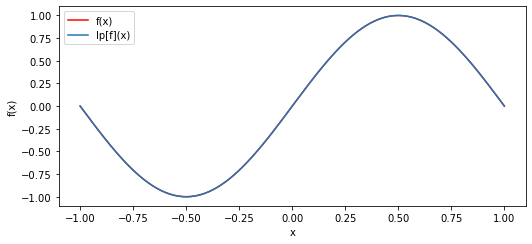

In [115]:
x = np.linspace(-1,1,200)
y = [f(r) for r in x]
plt.plot(x,y,c='r',label="f(x)")
plt.plot(x,Ip(f,10,x),label="Ip[f](x)") #using 10 LG nodes
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()
#completely coincides

## Differentiation in Physical space ##
Let us start with the implementation in the physical space. Assume that $u \in P_{N}$ is an approximation of the unknown solution $U$. Let $\left\{h_{j}\right\}_{j=0}^{N}$ be the Lagrange basis polynomials associated with a set of Gauss-type points $\left\{x_{j}\right\}_{j=0}^{N}$. Clearly,
$$
u(x)=\sum_{j=0}^{N} u\left(x_{j}\right) h_{j}(x) .
$$
Hence, differentiating it $m$ times leads to
$$
u^{(m)}\left(x_{k}\right)=\sum_{j=0}^{N} h_{j}^{(m)}\left(x_{k}\right) u\left(x_{j}\right), \quad 0 \leq k \leq N .
$$
Note [^1] that 
$$
D^{(m)}=D D \ldots D=D^{m}, \quad m \geq 1,
$$
and
$$
\mathbf{u}^{(m)}=D^{m} \mathbf{u}, \quad m \geq 1 .
$$
 - For the Legendre-Gauss-Lobatto case
 $$
d_{k j}= \begin{cases}-\frac{N(N+1)}{4}, & k=j=0, \\ \frac{L_{N}\left(x_{k}\right)}{L_{N}\left(x_{j}\right)} \frac{1}{x_{k}-x_{j}}, & k \neq j, 0 \leq k, j \leq N, \\ 0, & 1 \leq k=j \leq N-1, \\ \frac{N(N+1)}{4} & k=j=N\end{cases}
$$
 - For the Legendre-Gauss-Radau case
 $$
d_{k j}= \begin{cases}-\frac{N(N+2)}{4}, & k=j=0 \\ \frac{x_{k}}{1-x_{k}^{2}}+\frac{(N+1) L_{N}\left(x_{k}\right)}{\left(1-x_{k}^{2}\right) Q^{\prime}\left(x_{k}\right)}, & 1 \leq k=j \leq N \\ \frac{Q^{\prime}\left(x_{k}\right)}{Q^{\prime}\left(x_{j}\right)} \frac{1}{x_{k}-x_{j}}, & k \neq j\end{cases}
$$
where $Q(x)=L_{N}(x)+L_{N+1}(x)$ 
 - For the Legendre-Gauss case
 $$
d_{k j}= \begin{cases}\frac{L_{N+1}^{\prime}\left(x_{k}\right)}{L_{N+1}^{\prime}\left(x_{j}\right)} \frac{1}{x_{k}-x_{j}}, & k \neq j \\ \frac{x_{k}}{1-x_{k}^{2}}, & k=j\end{cases}
$$

[^1]: Also note that since $u^{(N+1)}(x) \equiv 0$ for any $u \in P_{N}$, we have $D^{N+1} \mathbf{u}=0$ for any $\mathbf{u} \in \mathbb{R}^{N+1}$. Hence, the only eigenvalue of $D$ is zero which has a multiplicity $N+1$.

In [116]:
#Differentiation matrices
def D_LG(N):
    nodes = LG(N)
    #nodes = sorted(nodes,reverse=False)
    l1 = L1(N+1,nodes)
    out = np.empty([N+1,N+1],dtype=float)
    for k in range(0,N+1):
        for j in range(0,N+1):
            if (k==j):
                out[k][j] = (nodes[k])/(1-((nodes[k])**2))
            else:
                out[k][j] = (l1[k][N+1])/(l1[j][N+1]*(nodes[k]-nodes[j]))
    return out
def D_LGL(N):
    nodes = LGL(N)
    l = L(N,nodes)
    #nodes = sorted(nodes,reverse=False)
    out = np.empty([N+1,N+1],dtype=float)
    for k in range(0,N+1):
        for j in range(0,N+1):
            if (k==j):
                if (k==0):
                    out[k][j] = (-1*(N*(N+1)))/4
                elif (k==N):
                    out[k][j] = ((N*(N+1)))/4
                else:
                    out[k][j] = 0
            else:
                out[k][j] = (l[k][N])/(l[j][N])*(nodes[k]-nodes[j])
    return out
def D_LGR(N):
    nodes = LGR(N)
    #nodes = sorted(nodes,reverse=False)
    l = L(N,nodes)
    l1 = L1(N+1,nodes)
    out = np.empty([N+1,N+1],dtype=float)
    for k in range(0,N+1):
        for j in range(0,N+1):
            if (k==j):
                if (k==0):
                    out[k][j] = (-1*(N*(N+2)))/4
                else:
                    out[k][j] = ((nodes[k])/(1-((nodes[k])**2))) + (((N+1)*l[k][N])/((1-(nodes[k]**2))*(l1[k][N]+l1[k][N+1])))
            else:
                out[k][j] = (l1[k][N+1]+l1[k][N])/((l1[j][N+1]+l1[j][N])*(nodes[k]-nodes[j]))
    return out

Using
$$
u^{\left( m\right)}(x)=\sum_{j=0}^{N} u^{\left( m\right)}\left(x_{j}\right) h_{j}(x) .
$$
We get the mth order derivative of $u\left(x\right)$

In [117]:
def Diff_coeff(u,N,m):
    nodes = LG(N)
    #nodes = sorted(nodes,reverse=False)
    D = D_LG(N)
    vec = np.array([u(x) for x in nodes])
    D = np.linalg.matrix_power(D,m)
    return D.dot(vec)
def Diff(u,N,m,x):
    eh = Diff_coeff(u,N,m)
    utilda = []
    nodes = LG(N)
    mat = L(N,nodes)
    w = wlg(N)
    for n in range(0,N+1):
        sum = 0
        for j in range(0,N+1):
            sum += eh[j]*mat[j][n]*w[j]
        sum = (sum*(2*n+1))/2
        utilda.append(sum)
    l = L(N,x)
    out = []
    for i in range(len(x)):
        sum = 0
        for j in range(0,N+1):
            sum += utilda[j]*l[i][j]
        out.append(sum)
    return out
#print(f(1))
#print(Diff(f,5,1,1))
#print(Diff_coeff(f,5,1))

#### Plotting f(x) = sin($\pi x$) and it's derivative (scaled) f'(x)/$\pi$ ####

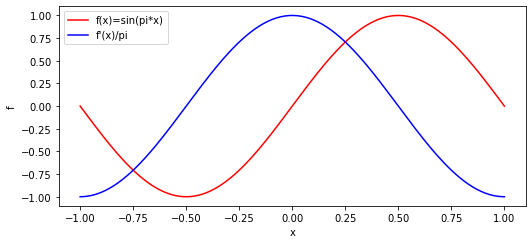

In [118]:
x = np.linspace(-1,1,200)
y = [f(r) for r in x]
plt.plot(x,y,c='r',label="f(x)=sin(pi*x)")
y = Diff(f,100,1,x)
y = [z/math.pi for z in y]
plt.plot(x,y,c='b',label="f'(x)/pi")
plt.xlabel("x")
plt.ylabel("f")
plt.legend()
plt.show()

Given $u \in P_{N}$, we write
$$
u(x)=\sum_{k=0}^{N} \hat{u}_{k} L_{k}(x) \in P_{N},
$$
using the backward recursive relation:
$$
\begin{aligned}
&\hat{u}_{k-1}^{(1)}=(2 k-1)\left(\hat{u}_{k}+\frac{\hat{u}_{k+1}^{(1)}}{2 k+3}\right), k=N-1, N-2, \ldots, 1, \\
&\hat{u}_{N}^{(1)}=0, \quad \hat{u}_{N-1}^{(1)}=(2 N-1) \hat{u}_{N}
\end{aligned}
$$
We can perform differentiations in frequency space accordingly.
<br> <br>
*Higher order derivatives can be evaluated by performing the following procedure recursively.*

In [119]:
#differentiation in frequency space
def u_diff(utilda,N):
    out = np.zeros(N+1)
    out[N-1] = (2*N-1)*utilda[N]
    for k in range(N-1,0,-1):
        out[k-1] = (2*k-1)*(utilda[k]+((out[k+1])/(2*k+3)))
    return out
def Diff2(u,N,m,x):
    utilda = fwd_legendre_transform(u,N)
    for _ in range(0,m):
        utilda = u_diff(utilda,N)
    out = []
    l = L(N,x)
    for i in range(len(x)):
        sum = 0
        for n in range(0,N+1):
            sum += utilda[n]*l[i][n]
        out.append(sum)
    return out
#""" print(f(2))
#print(Diff2(f,5,1,2)) """

#### Again verifying by plotting Plotting f(x) = sin($\pi x$) and f'(x)/$\pi$ ####

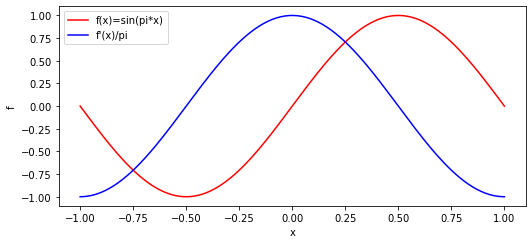

In [120]:
x = np.linspace(-1,1,200)
y = [f(r) for r in x]
plt.plot(x,y,c='r',label="f(x)=sin(pi*x)")
y = Diff2(f,100,1,x)
y = [z/math.pi for z in y]
plt.plot(x,y,c='b',label="f'(x)/pi")
plt.xlabel("x")
plt.ylabel("f")
plt.legend()
plt.show()

In [ ]:
""" def Ip(u,N):
    eh = u
    utilda = []
    mat = precomp(N)
    w = wlg(N)
    for n in range(0,N+1):
        sum = 0
        for j in range(0,N+1):
            sum += eh[j]*mat[n][j]*w[j]
        sum = (sum*(2*n+1))/2
        utilda.append(sum)
    sum = 0
    for j in range(0,N+1):
        sum += utilda[j]*L(j,x)
    return sum """